# **Any Face Clustering:**

> ### Step 1: *Runtime > Change Runtime Type > Hardware Accelerator > GPU > Save*
>
> ### Step 2: *Run all cells sequentially to visualize the mechanism and output of the project.*

---
## **Encoding faces**
---

### *Installing & Importing required packages*

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=2a1631f59213a5cb085dbd887f60936b71ff4bf4ec1bde455f2f857558337c1c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
from google.colab.patches import cv2_imshow
from imutils import paths
import face_recognition
import glob
import cv2
import os

### *Recognizing and Encoding the faces numerically, each with a 128-D feature vector generated by a Neural Network*

In [ ]:
# UPLOAD the images here to test

from google.colab import files
upload = files.upload()

Saving Abinash_sonali_1.jpg to Abinash_sonali_1.jpg
Saving Abinash_sonali_2.jpg to Abinash_sonali_2.jpg
Saving Abinash_sonali_3.jpg to Abinash_sonali_3.jpg
Saving Abinash_sonali_4.jpg to Abinash_sonali_4.jpg
Saving Abinash_sonali_5.jpg to Abinash_sonali_5.jpg
Saving Abinash_sonali_6.jpg to Abinash_sonali_6.jpg
Saving Abinash_sonali_7.jpg to Abinash_sonali_7.jpg
Saving Abinash_sonali_8.jpg to Abinash_sonali_8.jpg
Saving Abinash_sonali_9.jpg to Abinash_sonali_9.jpg
Saving Abinash_sonali_10.jpg to Abinash_sonali_10.jpg


In [ ]:
data = []

path = "/content/*.*"
# /content/image_2_hive.jpg

#for file in glob.glob(path):
for file in upload:
  print("[INFO] processing image {}".format(file))
  image = cv2.imread(file)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb, model = "cnn")
  # computing the facial embedding for the face
  encodings = face_recognition.face_encodings(rgb, boxes)
  # building a dictionary of the image path, bounding box location, and encodings for the current image
  d = [{"imagePath": file, "loc": box, "encoding": enc} for (box, enc) in zip(boxes, encodings)]
  data.extend(d)

  #cv2_imshow(image)
  #cv2_imshow(rgb)
  #print(boxes)
  #print(encodings)

[INFO] processing image Abinash_sonali_1.jpg
[INFO] processing image Abinash_sonali_2.jpg
[INFO] processing image Abinash_sonali_3.jpg
[INFO] processing image Abinash_sonali_4.jpg
[INFO] processing image Abinash_sonali_5.jpg
[INFO] processing image Abinash_sonali_6.jpg
[INFO] processing image Abinash_sonali_7.jpg
[INFO] processing image Abinash_sonali_8.jpg
[INFO] processing image Abinash_sonali_9.jpg
[INFO] processing image Abinash_sonali_10.jpg


---
## **Clustering the faces**
---

### *Installing & Importing required packages*

In [ ]:
from google.colab.patches import cv2_imshow
from sklearn.cluster import DBSCAN
from imutils import build_montages
import numpy as np

### *Preparing the Data and Face Encodings for clustering*

In [ ]:
# converting the data into a numpy array
np_data = np.array(data)
# extracting the 128-d facial encodings and placing them in a list
np_encodings = [item["encoding"] for item in np_data]

### *Clustering the Face Encodings using DBSCAN*

In [ ]:
print("[INFO] clustering...")
# initializing the clustering object
cluster = DBSCAN(metric = "euclidean", n_jobs = -1)
# fitting the clustering model on the encoded data
cluster.fit(np_encodings)

[INFO] clustering...


DBSCAN(n_jobs=-1)

### *Determining the number of unique faces recognized from the input data*

In [ ]:
labelIDs = np.unique(cluster.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] No. of unique faces: {}".format(numUniqueFaces))
print("[INFO] Label IDs: {}, where [-1] refers to unidentified faces or outliers".format(labelIDs))

[INFO] No. of unique faces: 2
[INFO] Label IDs: [-1  0  1], where [-1] refers to unidentified faces or outliers


### *Visualizing the images belonging to each unique labelID after clustering the faces*

[INFO] faces for face ID: -1


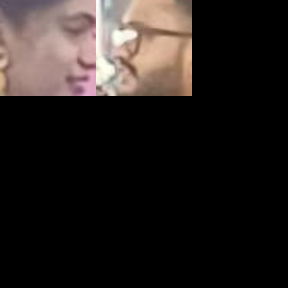

[INFO] faces for face ID: 0


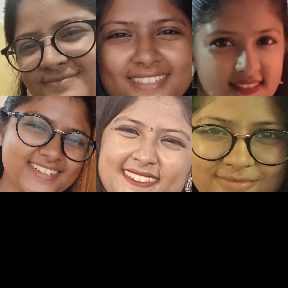

[INFO] faces for face ID: 1


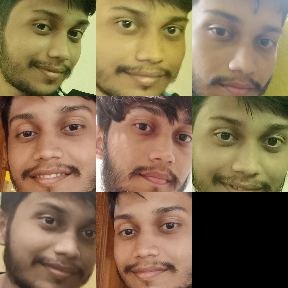

In [ ]:
# loop over the unique face integers
for labelID in labelIDs:
  # find all indexes into the 'pkl_data' array that belong to the current label ID, then randomly sample a maximum of 15 indexes from the set
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = np.where(cluster.labels_ == labelID)[0]
  idxs = np.random.choice(idxs, size = min(15, len(idxs)), replace = False)
  # initialize the list of faces to include in the montage
  faces = []

  for i in idxs:
    # load the input image and extract the face ROI
    current_image = cv2.imread(np_data[i]["imagePath"])
    (top, right, bottom, left) = np_data[i]["loc"]
    current_face = current_image[top:bottom, left:right]
    # force resize the face ROI to 96x96 and then add it to the faces montage list
    current_face = cv2.resize(current_face, (96, 96))
    faces.append(current_face)

  # create a montage using 96x96 "tiles" with 5 rows and 5 columns
  montage = build_montages(faces, (96, 96), (3, 3))[0]

  # show the output montage
  # current_title = "Face ID #{}".format(labelID)
  # current_title = "Unknown Faces" if labelID == -1 else current_title
  cv2_imshow(montage)